In [60]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### 1. SIR 

In [2]:
# The SIR model differential equations.
def deriv(state, t, N, beta, alpha):
    S, I, R = state
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - alpha * I
    dRdt = alpha * I
    return dSdt, dIdt, dRdt

R0 is 2.1


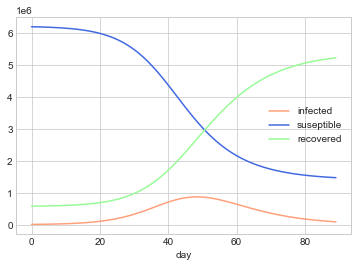

In [3]:
# beta
effective_contact_rate = 0.3
# alpha
recovery_rate = 1/7

# R0
print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
infected = 8143
recovered = 586913-infected
susceptible = total_pop - infected - recovered

# A list of days
days = range(0, 90)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['lightsalmon', 'royalblue', 'palegreen'],
        #kind='area',
        stacked=False)
plt.savefig('sirmadrid.eps', format='eps')

In [4]:
df

,suseptible,infected,recovered,day
0,6.192975e+06,8143.000000,5.787700e+05,0
1,6.190591e+06,9283.883018,5.800130e+05,1
2,6.187874e+06,10583.418075,5.814301e+05,2
3,6.184779e+06,12063.309608,5.830454e+05,3
4,6.181253e+06,13748.124916,5.848865e+05,4
...,...,...,...,...
85,1.497904e+06,120820.469605,5.161164e+06,85
86,1.490215e+06,111894.467176,5.177779e+06,86
87,1.483131e+06,103594.056162,5.193163e+06,87
88,1.476603e+06,95880.511857,5.207405e+06,88


In [5]:
df.describe()

,suseptible,infected,recovered,day
count,9.000000e+01,90.000000,9.000000e+01,90.000000
mean,3.834934e+06,361560.710816,2.583393e+06,44.500000
std,1.884492e+06,292083.498979,1.797954e+06,26.124701
min,1.470587e+06,8143.000000,5.787700e+05,0.000000
25%,1.837213e+06,104199.314571,7.286537e+05,22.250000
50%,3.739643e+06,282168.882913,2.207865e+06,44.500000
75%,5.912061e+06,625985.326381,4.502074e+06,66.750000
max,6.192975e+06,869235.403853,5.220584e+06,89.000000


In [6]:
df['infected'].idxmax()

48

### 2. SEIQR

In [61]:
# The SEIQR model differential equations.
def deriv1(state, t, N, theta, beta, alpha, ks, ka, Tinf, Tser, Tlat):
    S, E, Is, Ia, Q, R= state
    # Change in S population over time
    dSdt = -theta/Tinf * (Is + alpha*Ia)*S/N 
    dEdt = theta/Tinf * (Is + alpha*Ia)*S/N - E/Tlat
    dIsdt = (1-beta)*E/Tlat - (ks + 1/Tinf)*Is
    dIadt = beta*E/Tlat - (ka + 1/Tinf)*Ia
    dQdt = ks*Is + ka*Ia - Q/Tser
    dRdt = (Is+Ia)/Tinf + Q/Tser
    #dCdt = (1 - beta) * E/Tlat + ka*Ia
    return dSdt, dEdt, dIsdt, dIadt, dQdt, dRdt

R0 is 2.1


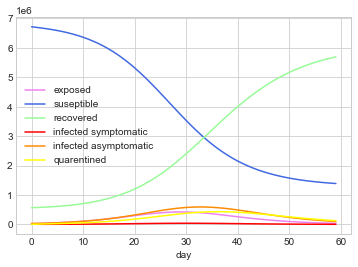

In [62]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 2

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)


# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('refmodel.eps', format='eps')

In [63]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,3.873069e+06,204014.619996,19163.013495,299983.637183,224798.662250,2.726809e+06,29.500000
std,2.007237e+06,135147.965630,12326.644607,188280.037956,142780.280103,1.866244e+06,17.464249
min,1.389764e+06,18963.000000,3860.385943,34312.000000,0.000000,5.679500e+05,0.000000
25%,1.831726e+06,78485.934004,7869.918433,130842.983699,100058.336993,8.756968e+05,14.750000
50%,3.619101e+06,177083.281750,16557.705229,274363.237309,220544.047410,2.327989e+06,29.500000
75%,5.982091e+06,327099.211737,30493.527358,474842.298956,360991.175658,4.583982e+06,44.250000
max,6.718035e+06,424177.615265,39319.438775,592912.621158,432361.754720,5.693562e+06,59.000000


In [64]:
df['infected symptomatic'].idxmax()

30

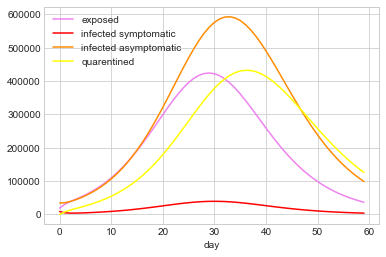

In [65]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('refmodel1.eps', format='eps')

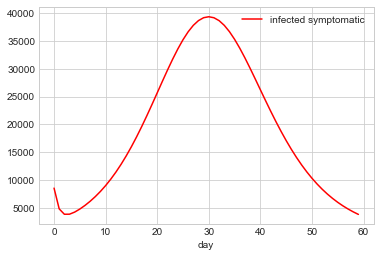

In [66]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('refmodel2.eps', format='eps')

#### 2.1 Less social distance

R0 is 2.1


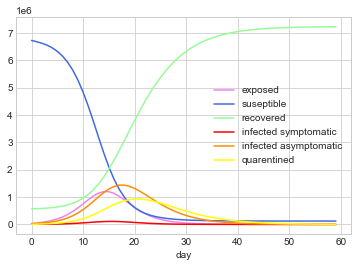

In [67]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 4

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)


# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('lessdistance.eps', format='eps')

In [68]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,6.000000e+01,60.000000
mean,1.580007e+06,2.536626e+05,23856.523613,3.806476e+05,296242.567826,4.813422e+06,29.500000
std,2.348124e+06,3.765836e+05,34410.921054,4.737871e+05,315523.265566,2.645973e+06,17.464249
min,1.223600e+05,9.052084e+01,10.784401,1.026037e+03,0.000000,5.679500e+05,0.000000
25%,1.243291e+05,1.885222e+03,227.688273,2.032037e+04,31690.949532,1.953168e+06,14.750000
50%,1.675322e+05,4.409822e+04,5688.184067,1.277041e+05,152223.427870,6.250729e+06,29.500000
75%,2.221265e+06,3.696013e+05,35100.240188,6.505301e+05,536777.247417,7.136525e+06,44.250000
max,6.718035e+06,1.198243e+06,108772.199658,1.433887e+06,927808.688734,7.218802e+06,59.000000


In [69]:
df['infected symptomatic'].idxmax()

15

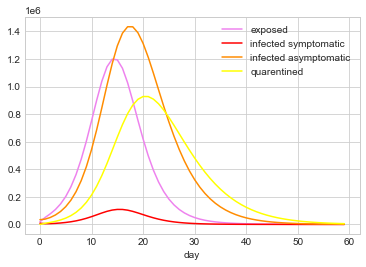

In [70]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('lessdistance1.eps', format='eps')

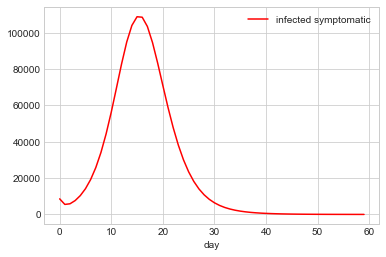

In [71]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('lessdistance2.eps', format='eps')

#### 2.2 More social distance

R0 is 2.1


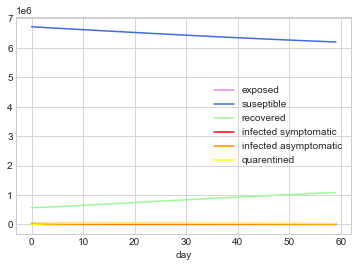

In [72]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 1

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)

# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('moredistance.eps', format='eps')

In [73]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,6.443633e+06,20240.756444,2077.680577,30882.239805,22429.664946,8.285746e+05,29.500000
std,1.543349e+05,1925.200596,947.450631,2553.957288,4412.542245,1.575224e+05,17.464249
min,6.200251e+06,16244.905824,1531.503334,25344.379267,0.000000,5.679500e+05,0.000000
25%,6.310224e+06,18795.230901,1766.921040,28973.124599,21824.694537,6.927408e+05,14.750000
50%,6.435691e+06,20753.741480,1955.900699,31748.333887,23704.355993,8.325008e+05,29.500000
75%,6.572856e+06,22018.713408,2067.615801,33199.663930,24962.496332,9.648410e+05,44.250000
max,6.718035e+06,22418.169130,8578.000000,34312.000000,25419.150125,1.083888e+06,59.000000


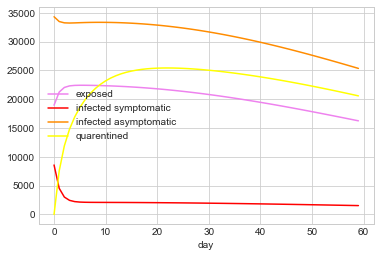

In [74]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('moredistance1.eps', format='eps')

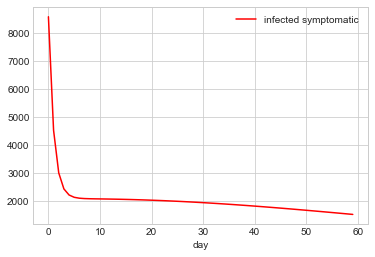

In [75]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('moredistance2.eps', format='eps')

#### 2.3 Massive testing

R0 is 2.1


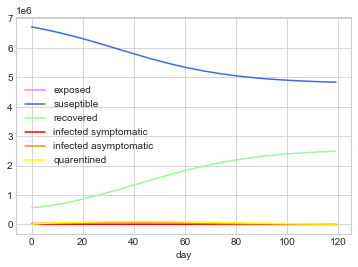

In [76]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 2

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.3

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)

# A list of days
days = range(0, 120)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('massivetesting.eps', format='eps')

In [77]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,1.200000e+02,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,5.533637e+06,36450.917779,3501.311277,29913.421852,60253.420962,1.684082e+06,59.500000
std,6.137058e+05,18392.642568,1750.462673,14236.450839,28342.525000,6.492255e+05,34.785054
min,4.834162e+06,5887.890971,574.067109,5224.144577,0.000000,5.679500e+05,0.000000
25%,4.967846e+06,18853.126465,1844.784118,16643.724827,34271.788496,1.081126e+06,29.750000
50%,5.352507e+06,39605.397410,3787.296426,32227.596119,63775.181934,1.819992e+06,59.500000
75%,6.066381e+06,53915.080923,5041.440216,43110.794790,87324.614902,2.301838e+06,89.250000
max,6.718035e+06,60185.336663,8578.000000,48181.682890,97225.104595,2.488644e+06,119.000000


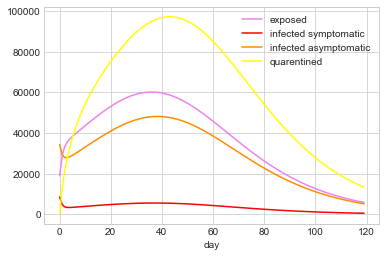

In [78]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('massivetesting1.eps', format='eps')

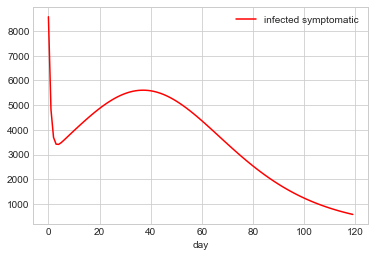

In [79]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('massivetesting2.eps', format='eps')

#### 2.4 Massive testing + social distancing

R0 is 2.1


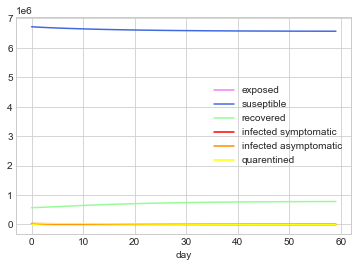

In [80]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 1

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.2

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)

# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('mt_sd.eps', format='eps')

In [81]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.603993e+06,6699.478911,842.069439,8796.321591,11845.704423,715661.307559,29.500000
std,4.127214e+04,6195.818493,1296.592343,8552.872100,8525.776967,63176.349372,17.464249
min,6.565678e+06,692.790818,69.074780,885.412607,0.000000,567950.000000,0.000000
25%,6.571882e+06,1707.847571,170.253390,2181.328380,4087.224733,676594.151970,14.750000
50%,6.587154e+06,4195.886584,418.115524,5350.922931,9854.704407,740276.126115,29.500000
75%,6.624572e+06,10226.358942,1018.032986,12992.991509,19661.921682,767554.829266,44.250000
max,6.718035e+06,20871.083848,8578.000000,34312.000000,26488.672198,778742.782653,59.000000


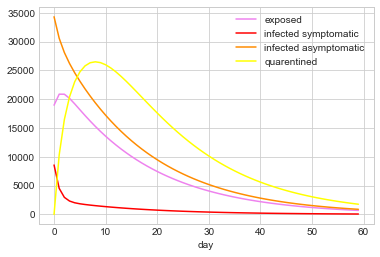

In [82]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('mt_sd1.eps', format='eps')

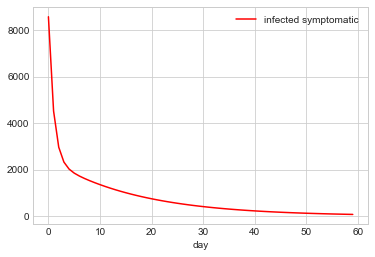

In [83]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('mt_sd2.eps', format='eps')

### 3. Vaccination SEIQR

In [84]:
# The SEIQR model differential equations.
def deriv1(state, t, N, theta, beta, alpha, ks, ka, Tinf, Tser, Tlat, v):
    S, E, Is, Ia, Q, R= state
    # Change in S population over time
    dSdt = -theta/Tinf * (Is + alpha*Ia)*S/N - v*S
    dEdt = theta/Tinf * (Is + alpha*Ia)*S/N - E/Tlat
    dIsdt = (1-beta)*E/Tlat - (ks + 1/Tinf)*Is
    dIadt = beta*E/Tlat - (ka + 1/Tinf)*Ia
    dQdt = ks*Is + ka*Ia - Q/Tser
    dRdt = (Is+Ia)/Tinf + Q/Tser + v*S
    #dCdt = (1 - beta) * E/Tlat + ka*Ia
    return dSdt, dEdt, dIsdt, dIadt, dQdt, dRdt

R0 is 2.1


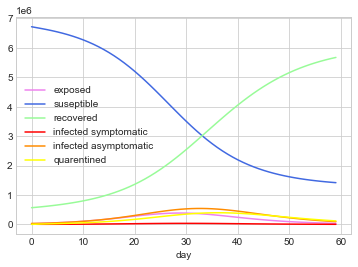

In [85]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 2

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1
# v
vaccine = 0.0015 * 0.95

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)


# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period, vaccine))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('vaccine.eps', format='eps')

In [86]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,3.850279e+06,190534.484793,17908.355307,280109.980514,209751.970691,2.799254e+06,29.500000
std,1.955917e+06,122268.644679,11132.389952,170742.671223,130190.655627,1.823557e+06,17.464249
min,1.418541e+06,18963.000000,3782.841569,34312.000000,0.000000,5.679500e+05,0.000000
25%,1.880328e+06,76366.925239,7723.465042,126123.614081,97947.865023,1.006034e+06,14.750000
50%,3.587518e+06,168802.979295,15774.897750,260164.270412,208211.365556,2.474071e+06,29.500000
75%,5.867195e+06,303366.684525,28155.917668,440512.784680,333574.628412,4.601004e+06,44.250000
max,6.718035e+06,386642.626503,35853.278758,542130.262414,396568.752708,5.675130e+06,59.000000


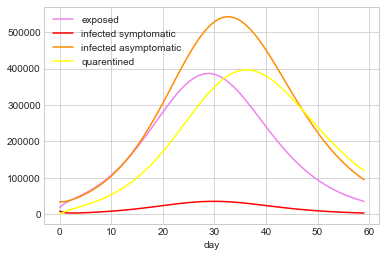

In [87]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('vaccine1.eps', format='eps')

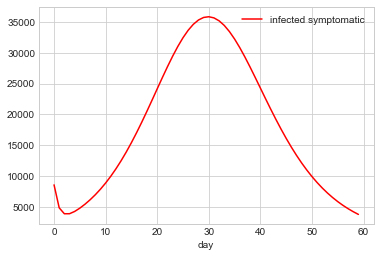

In [88]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('vaccine2.eps', format='eps')

#### 3.1 Vaccination SEIRQ with less social distance

R0 is 2.1


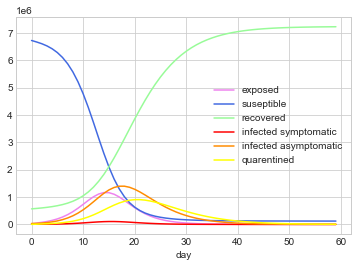

In [89]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 4

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1
# v
vaccine = 0.0015 * 0.95

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)


# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period, vaccine))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_lessdistance.eps', format='eps')

In [90]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,6.000000e+01,60.000000
mean,1.575534e+06,2.487158e+05,23395.639185,3.732728e+05,290490.793443,4.836429e+06,29.500000
std,2.332153e+06,3.666765e+05,33510.113384,4.620169e+05,307976.589283,2.620191e+06,17.464249
min,1.215782e+05,9.136500e+01,10.903498,1.036426e+03,0.000000,5.679500e+05,0.000000
25%,1.261751e+05,1.930222e+03,233.262395,2.044477e+04,31626.318351,2.037365e+06,14.750000
50%,1.735092e+05,4.467261e+04,5685.406407,1.273574e+05,150738.141102,6.254431e+06,29.500000
75%,2.223948e+06,3.653391e+05,34666.266555,6.409437e+05,525355.157118,7.134891e+06,44.250000
max,6.718035e+06,1.162553e+06,105585.425727,1.396104e+06,904953.706863,7.219578e+06,59.000000


In [91]:
df['infected symptomatic'].idxmax()

15

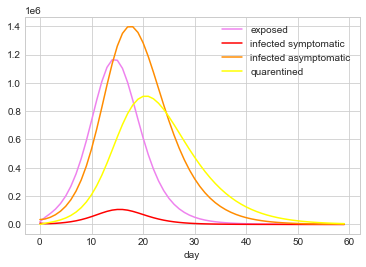

In [92]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_lessdistance1.eps', format='eps')

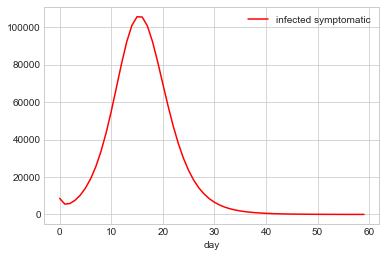

In [93]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('v_lessdistance2.eps', format='eps')

#### 3.2 Vaccinatio SEIQR with more social distance

R0 is 2.1


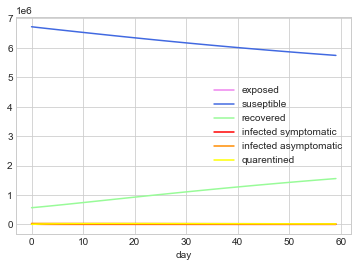

In [94]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 1

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.1
# v
vaccine = 0.0015 * 0.95

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)

# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period, vaccine))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_moredistance.eps', format='eps')

In [95]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,6.196309e+06,17917.434423,1869.815148,27940.001826,20489.704436,1.083312e+06,29.500000
std,2.897408e+05,3590.440792,1025.311904,4935.764822,4522.825288,2.987258e+05,17.464249
min,5.744028e+06,11036.975179,1053.734085,18110.415086,0.000000,5.679500e+05,0.000000
25%,5.946087e+06,14928.714474,1417.558408,23922.179230,18359.140539,8.302859e+05,14.750000
50%,6.177775e+06,18687.341435,1763.619240,29175.311541,21680.069823,1.096921e+06,29.500000
75%,6.437007e+06,21242.920067,2010.235331,32562.336619,23921.038138,1.341645e+06,44.250000
max,6.718035e+06,22320.919536,8578.000000,34312.000000,24777.965783,1.558224e+06,59.000000


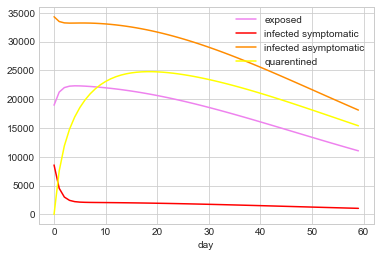

In [96]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_moredistance1.eps', format='eps')

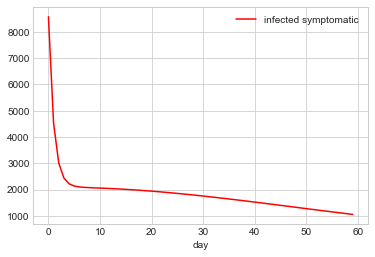

In [97]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('v_moredistance2.eps', format='eps')

#### 3.3 Vaccination SEIQR with massive testing

R0 is 2.1


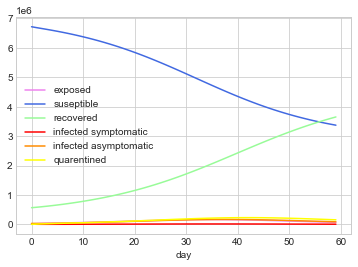

In [98]:
effective_contact_rate = 0.3
recovery_rate = 1/7
interaction_factor = 2

# R0
print("R0 is", effective_contact_rate / recovery_rate)

#theta
theta = effective_contact_rate / recovery_rate * interaction_factor
# ks
isolation_rate_s = 0.8
# ka
isolation_rate_a = 0.2
# v
vaccine = 0.0015 * 0.95

# beta
asymptomatic_population_ratio = 0.8
#alpha
infectiousness_ratio = 1
# Tser
serial_interval = 7.5
# Tlat
mean_incubation_period = 5.2
# Tinf
Infectious_period = serial_interval - mean_incubation_period



# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 6779888
exposed = 18963
recovered = 586913-exposed
quarentined = 0 
infectious_s = 8578
infectious_a = asymptomatic_population_ratio * infectious_s / (1-asymptomatic_population_ratio)
susceptible = total_pop - exposed - infectious_s/(1-asymptomatic_population_ratio)

# A list of days
days = range(0, 60)

# Use differential equations magic with our population
ret = odeint(deriv1,
             [susceptible, exposed, infectious_s, infectious_a, quarentined, recovered],
             days,
             args=(total_pop, theta, asymptomatic_population_ratio, infectiousness_ratio, isolation_rate_s, isolation_rate_a, serial_interval, mean_incubation_period, Infectious_period, vaccine))
S, E, Is, Ia, Q, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'exposed' : E,
    'infected symptomatic': Is,
    'infected asymptomatic': Ia,
    'quarentined': Q,
    'recovered': R,
    'day': days
})

plt.style.use('seaborn-whitegrid')
df.plot(x='day',
        y=['exposed', 'suseptible', 'recovered', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'royalblue', 'palegreen', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_massivetesting.eps', format='eps')

In [99]:
df.describe()

,suseptible,exposed,infected symptomatic,infected asymptomatic,quarentined,recovered,day
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,5.103449e+06,110525.886229,10395.239314,112878.007365,146730.027499,1.863860e+06,29.500000
std,1.110594e+06,41895.992243,3730.868137,44980.800795,72402.874420,1.001392e+06,17.464249
min,3.372210e+06,18963.000000,3635.769887,32075.819507,0.000000,5.679500e+05,0.000000
25%,4.061365e+06,78986.705232,7487.672018,78288.542829,83241.126473,9.385285e+05,14.750000
50%,5.156493e+06,115393.653834,10747.776488,120147.573248,167968.114616,1.684252e+06,29.500000
75%,6.151083e+06,149325.071636,13880.662053,154325.711228,210956.355365,2.745605e+06,44.250000
max,6.718035e+06,164022.731198,15253.944220,168761.439599,230078.389729,3.652321e+06,59.000000


In [100]:
df['infected symptomatic'].idxmax()

36

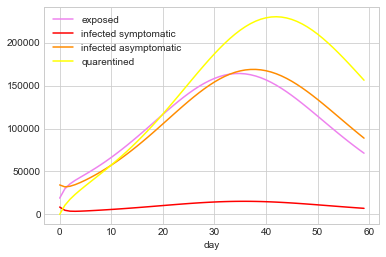

In [101]:
df.plot(x='day',
        y=['exposed', 'infected symptomatic', 'infected asymptomatic', 'quarentined'],
        color=['violet', 'r', 'darkorange', 'yellow'],
        #kind='area',
        stacked=False)
plt.savefig('v_massivetesting1.eps', format='eps')

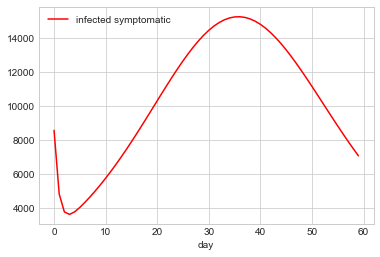

In [102]:
df.plot(x='day',
        y=['infected symptomatic'],
        color=['r'],
        #kind='area',
        stacked=False)
plt.savefig('v_massivetesting2.eps', format='eps')